# 問題1 1次関数

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#x が-50から50のndarrayを作成
x = np.arange(-50, 50.1, 0.1)
x = x.reshape(len(x),1)
print(x.shape)

#yにxの式を代入
y = np.array(1 / 2 * x + 1)
print(y.shape)
print('xの値')
print(x[:5])
print('yの値')
print(y[:5])

(1001, 1)
(1001, 1)
xの値
[[-50. ]
 [-49.9]
 [-49.8]
 [-49.7]
 [-49.6]]
yの値
[[-24.  ]
 [-23.95]
 [-23.9 ]
 [-23.85]
 [-23.8 ]]


# 問題2 配列の結合

In [14]:
xy_plot = np.hstack((x, y))
xy_plot.shape

(1001, 2)

# 問題3 勾配を求める

In [15]:
import matplotlib.pyplot as plt
def function(x):
    return (1/2)*x + 1

def compute_gradient(function,x_range=(-50,50.1,0.1)):
    x = np.arange(x_range[0],x_range[1],x_range[2])
    #print(x)
    x = x.reshape(1001,1)
    y = function(x)
    xy = np.hstack((x,y))
    d_xy = xy[1:,:] - xy[:-1,:]
    #print(d_xy.shape)
    dxy = d_xy[:,1]/d_xy[:,0]
    return dxy
    


grads = compute_gradient(function)
print('先頭５つの勾配')
print(grads[:5])
print('勾配を格納した配列の形')
print(grads.shape)

先頭５つの勾配
[0.5 0.5 0.5 0.5 0.5]
勾配を格納した配列の形
(1000,)


# 問題4 グラフをかく

Text(0, 0.5, 'y')

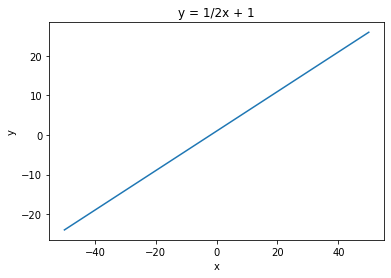

In [16]:
plt.plot(x,y)
plt.title('y = 1/2x + 1')
plt.xlabel('x')
plt.ylabel('y')

(1000,)
(1000,)


Text(0.5, 1.0, 'gradient of function')

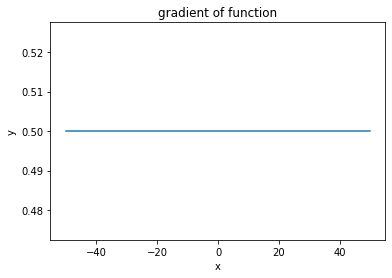

In [17]:
dxy = compute_gradient(function)
X = np.arange(-50,50,0.1)
print(X.shape)
print(dxy.shape)
plt.plot(X,dxy)
plt.xlabel('x')
plt.ylabel('y')
plt.title('gradient of function')

# 問題5 Pythonの関数化

In [18]:
def compute_allprocess(function,x_range=(-50,50.1,0.1)):
    x = np.arange(x_range[0],x_range[1],x_range[2])
    #print(x)
    x = x.reshape(len(x),1)
    y = function(x)
    xy = np.hstack((x,y))
    d_xy = xy[1:,:] - xy[:-1,:]
    #print(d_xy.shape)
    dxy = d_xy[:,1]/d_xy[:,0]
    return x,y,dxy


def function1(x):
    return x**2


def function2(x):
    return 2*x**2 + 2*x

def function3(x):
    return np.sin(x**(1/2))

def compute_manydef(defs,compute_allprocess,x_range_list):
    params = {}
    
    for func,x_range in zip(defs,x_range_list):
        x,y,dxy = compute_allprocess(func,x_range)
        params[func] = [x,y,dxy]
    return params
        
        
    

    
    

<function function1 at 0x110153730>
<function function2 at 0x110868268>
<function function3 at 0x1108682f0>


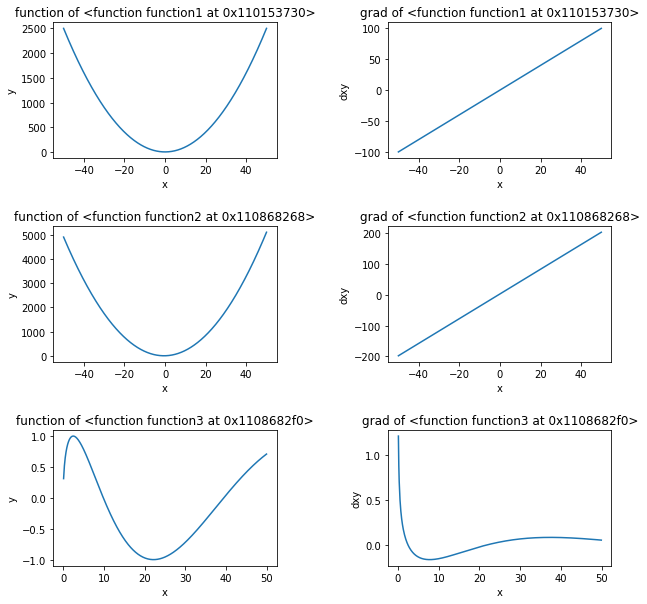

In [25]:
defs = [function1, function2, function3]
x_range_list = [(-50,50.1,0.1),(-50,50.1,0.1),(0.1,50.1,0.1)]
params = compute_manydef(defs,compute_allprocess, x_range_list)

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
count = 1
for idx,df in enumerate(defs):
    print(df)
    plt.subplot(len(defs),2,count)
    plt.plot(params[df][0],params[df][1])
    plt.title('function of ' + str(df))
    plt.xlabel('x')
    plt.ylabel('y')
    count += 1
    plt.subplot(len(defs),2, count)
    plt.plot(params[df][0][:-1],params[df][2])
    plt.title('grad of '+str(df))
    plt.xlabel('x')
    plt.ylabel('dxy')
    count += 1
    
    
    
 

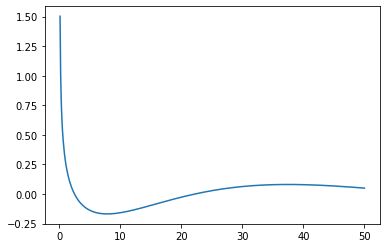

In [27]:
#function3の勾配の解析値

x = np.arange(0.1,50.1,0.1)
grad = np.cos(x**(1/2)) * (1/2) * (x**(-1/2))
plt.plot(x,grad)

function3の勾配に関して、xの値が５−２０付近で勾配の負の値が小さいことに疑問を抱いたが、よくみると関数のyの値の幅小さいのに対し、
xの値の幅が大きいので勾配の値は妥当であることがわかる。<br>
下図参照

(-1, 50)

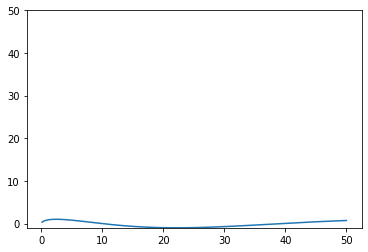

In [32]:
#xとyのスケールをほぼ同一にしたときのfunction3
x = np.arange(0.1,50.1,0.1)
y = function3(x)
plt.plot(x,y)
plt.ylim([-1,50])

# 問題6 最小値を求める

In [29]:
def get_min(params):
    mingrads = {}
    minvalues = {}
    for key in params.keys():
        minvalue = params[key][1].min()
        minindex = np.argmin(params[key][1])
        y_before = params[key][1][minindex -1]
        y_after = params[key][1][minindex+1]
        grad = (y_after - y_before) / 0.2
        mingrads[key] = grad
        minvalues[key] = minvalue
    return mingrads,minvalues        
        
        

In [30]:
mingrads, minvalues = get_min(params)

In [31]:
funcname = ['function1','function2','function3']
for keyname, key in zip (funcname,params.keys()):
    print(keyname + 'の最小値:{}'.format(minvalues[key]))
    print(keyname + 'の最小値の勾配:{}'.format(mingrads[key]))

function1の最小値:5.048709793414476e-25
function1の最小値の勾配:[1.42108547e-12]
function2の最小値:-0.5
function2の最小値の勾配:[2.8135827e-12]
function3の最小値:-0.9999997540298113
function3の最小値の勾配:[-7.56972314e-05]
